# Interpolate sine function with integrals

Copyright 2024 Stephan Kulla ("Kulla")

Licensed under the Apache License, Version 2.0 (the "Apache License") and Creative Commons Attribution 4.0 International (the "CC-BY License"). You may choose either of these licenses to govern your use of this project.

You may obtain a copy of the Apache License at:
    http://www.apache.org/licenses/LICENSE-2.0

You may obtain a copy of the CC-BY License at:
    https://creativecommons.org/licenses/by/4.0/

Unless required by applicable law or agreed to in writing, software and content distributed under the Apache License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the Apache License for the specific language governing permissions and limitations under the License.

Under the CC-BY License, you are free to share and adapt the material provided you give appropriate credit, provide a link to the license, and indicate if changes were made. See the CC-BY License for full details.

Third-Party Components and Licenses:
This product also includes third-party components which are distributed under their respective licenses. Please refer to the NOTICE file for details.

## Utility functions and imports

In [2]:
%load_ext jupyter_ai_magics

The jupyter_ai_magics extension is already loaded. To reload it, use:
  %reload_ext jupyter_ai_magics


In [13]:
import string

from sympy import symbols, latex
from IPython.display import display, Markdown

class LatexFormatter(string.Formatter):
    def format_field(self, value, format_spec):
        if format_spec == 'latex:inline':
            return "$" + latex(value) + "$"
        elif format_spec == 'latex:block':
            return "$$" + latex(value) + "$$"
        else:
            return super().format_field(value, format_spec)

def display_markdown(template, **kwargs):
    display(Markdown(LatexFormatter().format(template, **kwargs)))

x = symbols("x")

display_markdown("{n}th function {f:latex:inline} and {g:latex:block}", n=10, f=x**2+2*x+1, g=x**3+5*x**2)

10th function $x^{2} + 2 x + 1$ and $$x^{3} + 5 x^{2}$$

# Plot the sine function

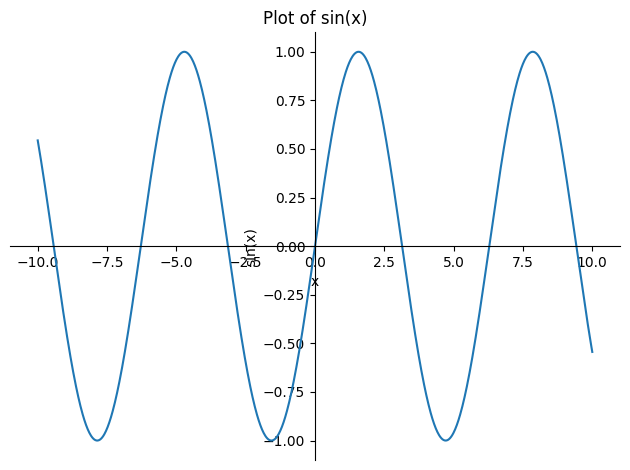

In [6]:
from sympy import symbols, sin
from sympy.plotting import plot

# Radius around zero where we want to interpolate the sine function
r = 10

# Define the symbolic variable
x = symbols('x')

# Plot the sine function from -10 to 10
plot(sin(x), (x, -r, r), title='Plot of sin(x)', xlabel='x', ylabel='sin(x)')

## Antiderivative helper functions

In [15]:
from sympy import symbols, integrate

def antiderivative(expr):
    """
    Returns the antiderivative of a given SymPy expression with respect to x.

    Parameters:
    expr (SymPy expression): The expression to integrate.

    Returns:
    SymPy expression: The antiderivative of the input expression.
    """
    return integrate(expr, x)

print(antiderivative(sin(x)))
print(antiderivative(antiderivative(sin(x))))

-cos(x)
-sin(x)


In [14]:
from sympy import symbols, integrate, factorial

def nth_antiderivative(expr, n=1):
    """
    Returns the nth antiderivative of a given SymPy expression with respect to x.

    Parameters:
    expr (SymPy expression): The expression to integrate.
    n (int): The order of the antiderivative.

    Returns:
    SymPy expression: The nth antiderivative of the input expression.
    """
    if n < 0:
        raise ValueError("The order of antiderivative must be a non-negative integer.")
    
    antideriv = expr
    for _ in range(n):
        antideriv = antiderivative(antideriv)
    return antideriv

for n in range(10):
    display_markdown("{n}th antiderivative: {antiderivative:latex:inline}", antiderivative=nth_antiderivative(sin(x), n), n=n)

0th antiderivative: $\sin{\left(x \right)}$

1th antiderivative: $- \cos{\left(x \right)}$

2th antiderivative: $- \sin{\left(x \right)}$

3th antiderivative: $\cos{\left(x \right)}$

4th antiderivative: $\sin{\left(x \right)}$

5th antiderivative: $- \cos{\left(x \right)}$

6th antiderivative: $- \sin{\left(x \right)}$

7th antiderivative: $\cos{\left(x \right)}$

8th antiderivative: $\sin{\left(x \right)}$

9th antiderivative: $- \cos{\left(x \right)}$

In [28]:
def nth_integration(expr, n=1, r=10, x=x):
    antideriv = nth_antiderivative(expr, n=n-1)
    return integrate(antideriv, (x, -r, r))

for n in range(1,10):
    display_markdown("n={n}: {value:latex:inline}", n=n, value=nth_integration(sin(x), n=n))

n=1: $0$

n=2: $- 2 \sin{\left(10 \right)}$

n=3: $0$

n=4: $2 \sin{\left(10 \right)}$

n=5: $0$

n=6: $- 2 \sin{\left(10 \right)}$

n=7: $0$

n=8: $2 \sin{\left(10 \right)}$

n=9: $0$

## Interpolate quadratic function

Quadratic interpolation: $- \frac{3 x \sin{\left(10 \right)}}{500}$

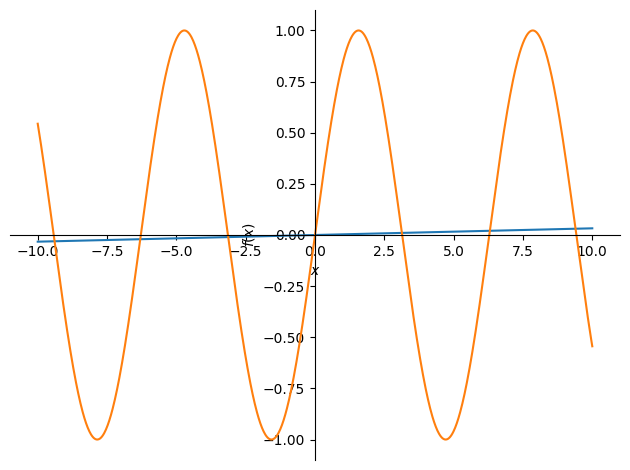

In [34]:
from sympy import symbols, Eq, solve

def interpolate_quadratic_function(expr, r=10, x=x):
    a,b,c = symbols("a b c")
    quadratic_function = a*x**2 + b*x + c

    equations = [Eq(nth_integration(expr, n=n), nth_integration(quadratic_function, n=n)) for n in range(1,4)]

    params = solve(equations, (a,b,c))
    solution = quadratic_function.subs(params)

    return solution

quadratic_interpolation = interpolate_quadratic_function(sin(x))
display_markdown("Quadratic interpolation: {f:latex:inline}", f=quadratic_interpolation)

plot(quadratic_interpolation, sin(x), (x, -10, 10))

# N-th interpolation

interpolation: $- \frac{190955969404105080287437081286989736404826988282795015159570361737 x^{19} \sin{\left(10 \right)}}{59225550864559917019405121450110949912776108477783203125000000000000000000} + \frac{119915597880462385393453323330529038496655264873435596327023434463 x^{17} \sin{\left(10 \right)}}{118451101729119834038810242900221899825552216955566406250000000000000000} - \frac{1875891693675538710289663755491757640791424432670469953012724178707 x^{15} \sin{\left(10 \right)}}{14806387716139979254851280362527737478194027119445800781250000000000000} + \frac{480054984010039084785421800116550205043314971398913769988763851343 x^{13} \sin{\left(10 \right)}}{59225550864559917019405121450110949912776108477783203125000000000000} - \frac{167711034850224807657024679559660454588313764599545303699488734643 x^{11} \sin{\left(10 \right)}}{592255508645599170194051214501109499127761084777832031250000000000} + \frac{7938331834014222856873553481446944977454456680351137489038631511 x^{9} \sin{\left(10 \right)}}{1480638771613997925485128036252773747819402711944580078125000000} - \frac{3052231404067321298336734528743014931425368697980650744496047651 x^{7} \sin{\left(10 \right)}}{59225550864559917019405121450110949912776108477783203125000000} + \frac{6466439529698029323243680374226890682012845235872915466281245507 x^{5} \sin{\left(10 \right)}}{29612775432279958509702560725055474956388054238891601562500000} - \frac{2262834533704879537600058918687792452811984280149145887667978 x^{3} \sin{\left(10 \right)}}{7403193858069989627425640181263868739097013559722900390625} + \frac{16286307121321954231240152789109357225048354854408039147573 x \sin{\left(10 \right)}}{236902203458239668077620485800443799651104433911132812500}$

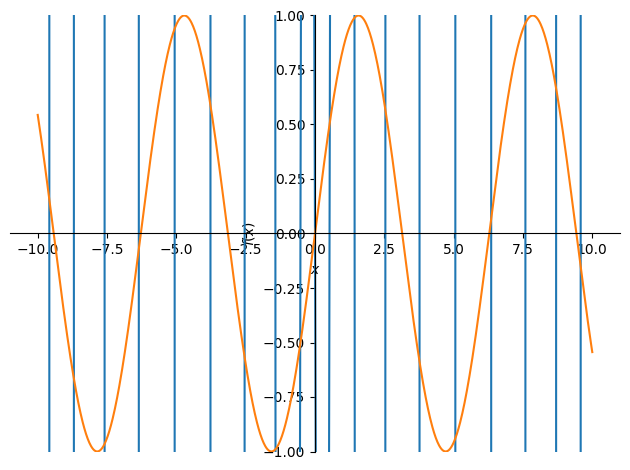

In [44]:
def nth_interpolation(expr, n, r=10, x=x):
    coefficients = symbols(f"x0:{n}")
    polynomial = sum(coeff * x**i for i, coeff in enumerate(coefficients))

    equations = [Eq(nth_integration(expr, n=n), nth_integration(polynomial, n=n)) for n in range(1, n+1)]

    params = solve(equations, coefficients)
    solution = polynomial.subs(params)

    return solution

interpolation = nth_interpolation(sin(x), 20)
display_markdown("interpolation: {f:latex:inline}", f=interpolation)
plot(interpolation, sin(x), (x, -10, 10), ylim=(-1, 1))

# Comparision with taylor series

expression: $$\sin{\left(x \right)}$$ taylor: $$- \frac{x^{3}}{6} + x$$ interpolation: $$- \frac{63 x^{3} \sin{\left(10 \right)}}{137500} + \frac{213 x \sin{\left(10 \right)}}{27500}$$

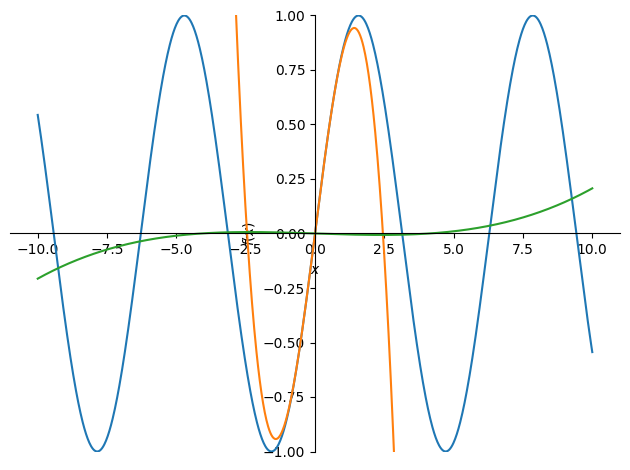

In [56]:
from scipy.optimize import minimize_scalar
from sympy import symbols, series, lambdify, Poly

def get_ylim(expr, a, b):
    lambdified_expr = lambdify(x, expr, "numpy")

    res_min = minimize_scalar(lambdified_expr)
    res_max = minimize_scalar(lambda x: -lambdified_expr(x))

    return (res_min.fun, -res_max.fun)

def nth_comparision(expr, n, r=10, x=x):
    taylor = series(expr, x, 0, n).removeO()
    interpolation = nth_interpolation(expr, n=n, r=r)

    display_markdown("expression: {expr:latex:block} taylor: {taylor:latex:block} interpolation: {interpolation:latex:block}", expr=expr, taylor=taylor, interpolation=interpolation)
    plot(expr, taylor, interpolation, (x, -r, r), ylim=get_ylim(expr, -r, r))

nth_comparision(sin(x), 5)

## Show comparisions

expression: $$\sin{\left(x \right)}$$ taylor: $$0$$ interpolation: $$0$$

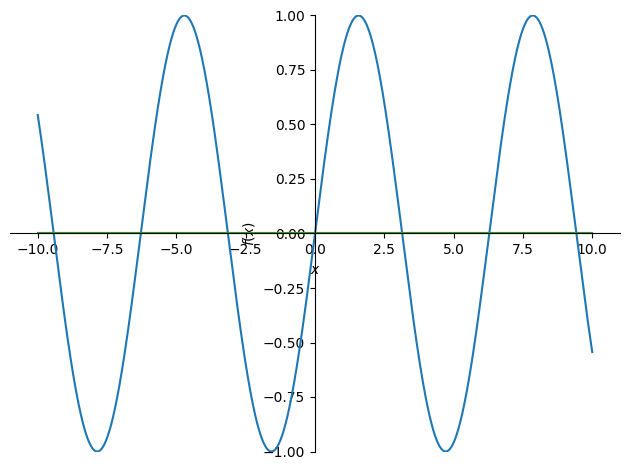

expression: $$\sin{\left(x \right)}$$ taylor: $$x$$ interpolation: $$- \frac{3 x \sin{\left(10 \right)}}{500}$$

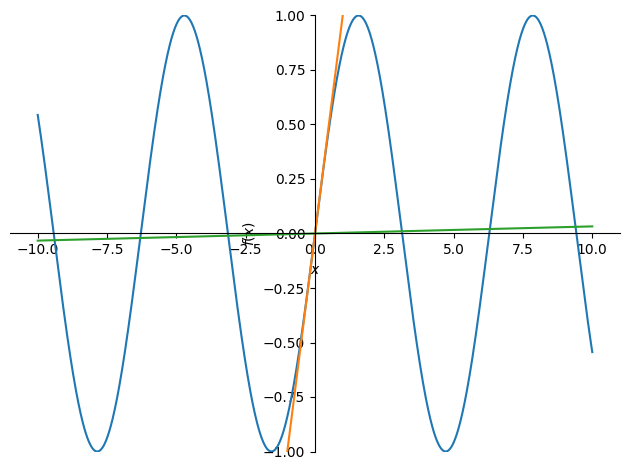

expression: $$\sin{\left(x \right)}$$ taylor: $$- \frac{x^{3}}{6} + x$$ interpolation: $$- \frac{63 x^{3} \sin{\left(10 \right)}}{137500} + \frac{213 x \sin{\left(10 \right)}}{27500}$$

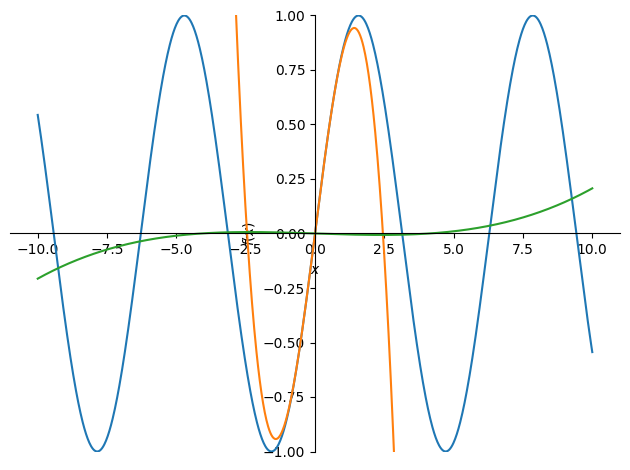

expression: $$\sin{\left(x \right)}$$ taylor: $$\frac{x^{5}}{120} - \frac{x^{3}}{6} + x$$ interpolation: $$- \frac{1151577 x^{5} \sin{\left(10 \right)}}{37812500000} + \frac{1282239 x^{3} \sin{\left(10 \right)}}{831875000} - \frac{7266 x \sin{\left(10 \right)}}{831875}$$

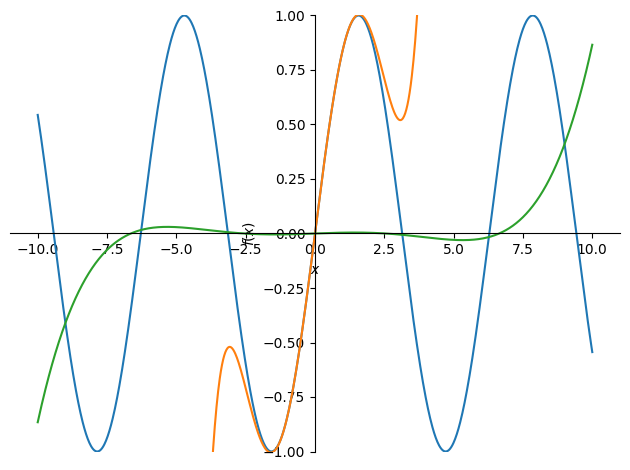

expression: $$\sin{\left(x \right)}$$ taylor: $$- \frac{x^{7}}{5040} + \frac{x^{5}}{120} - \frac{x^{3}}{6} + x$$ interpolation: $$- \frac{359722982619 x^{7} \sin{\left(10 \right)}}{138200703125000000} + \frac{322675542189 x^{5} \sin{\left(10 \right)}}{1382007031250000} - \frac{24844652217 x^{3} \sin{\left(10 \right)}}{5528028125000} + \frac{6738776541 x \sin{\left(10 \right)}}{552802812500}$$

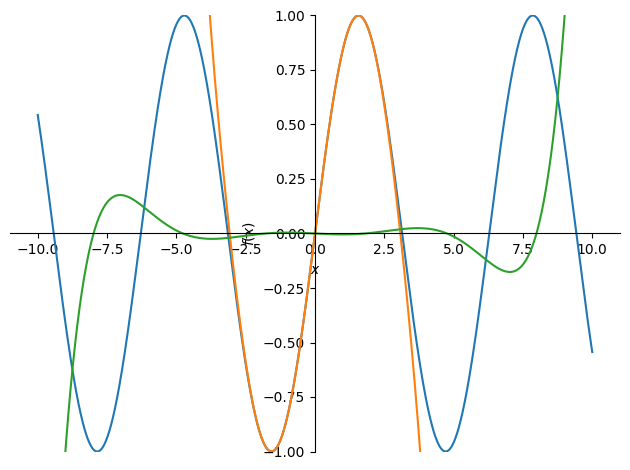

expression: $$\sin{\left(x \right)}$$ taylor: $$\frac{x^{9}}{362880} - \frac{x^{7}}{5040} + \frac{x^{5}}{120} - \frac{x^{3}}{6} + x$$ interpolation: $$- \frac{336293963667724491 x^{9} \sin{\left(10 \right)}}{1007895972226562500000000} + \frac{434870160217565787 x^{7} \sin{\left(10 \right)}}{10078959722265625000000} - \frac{49070364004559898 x^{5} \sin{\left(10 \right)}}{31496749132080078125} + \frac{31433861849521131 x^{3} \sin{\left(10 \right)}}{2015791944453125000} - \frac{957038170636449 x \sin{\left(10 \right)}}{40315838889062500}$$

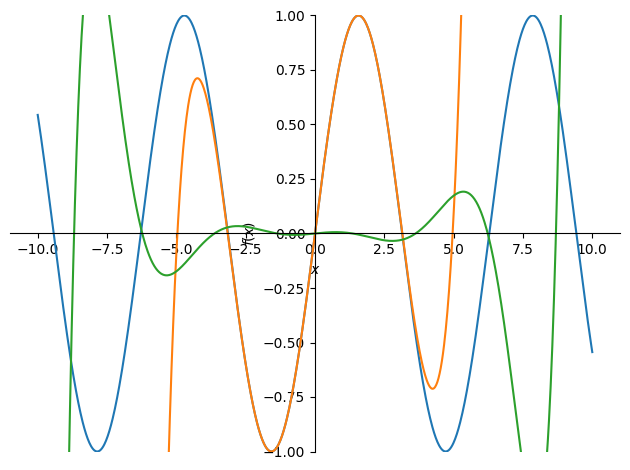

expression: $$\sin{\left(x \right)}$$ taylor: $$- \frac{x^{11}}{39916800} + \frac{x^{9}}{362880} - \frac{x^{7}}{5040} + \frac{x^{5}}{120} - \frac{x^{3}}{6} + x$$ interpolation: $$- \frac{133180807385314945684226799 x^{11} \sin{\left(10 \right)}}{2015782444305157714843750000000000} + \frac{89362455882429106923993447 x^{9} \sin{\left(10 \right)}}{8063129777220630859375000000000} - \frac{24075485218105118966010843 x^{7} \sin{\left(10 \right)}}{40315648886103154296875000000} + \frac{47273890456224394878766851 x^{5} \sin{\left(10 \right)}}{4031564888610315429687500000} - \frac{282092121313783352200629 x^{3} \sin{\left(10 \right)}}{4031564888610315429687500} + \frac{13223732631649158406788 x \sin{\left(10 \right)}}{201578244430515771484375}$$

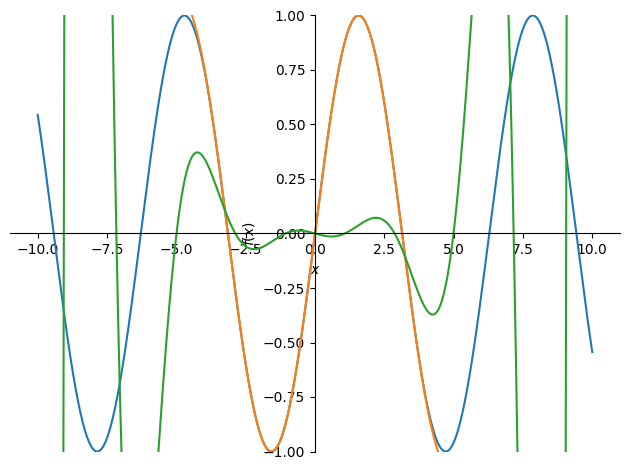

expression: $$\sin{\left(x \right)}$$ taylor: $$\frac{x^{13}}{6227020800} - \frac{x^{11}}{39916800} + \frac{x^{9}}{362880} - \frac{x^{7}}{5040} + \frac{x^{5}}{120} - \frac{x^{3}}{6} + x$$ interpolation: $$- \frac{275279668892926155671739156023211 x^{13} \sin{\left(10 \right)}}{14147295013428656752615234375000000000000} + \frac{3528124592404218170392687113623259 x^{11} \sin{\left(10 \right)}}{884205938339291047038452148437500000000} - \frac{1012729255573437223711052660624127 x^{9} \sin{\left(10 \right)}}{3536823753357164188153808593750000000} + \frac{612659788261067784253410613676457 x^{7} \sin{\left(10 \right)}}{70736475067143283763076171875000000} - \frac{745772573464625433314239550737839 x^{5} \sin{\left(10 \right)}}{7073647506714328376307617187500000} + \frac{5758348432862308874795036389557 x^{3} \sin{\left(10 \right)}}{14147295013428656752615234375000} - \frac{354455206904911181756485770153 x \sin{\left(10 \right)}}{1414729501342865675261523437500}$$

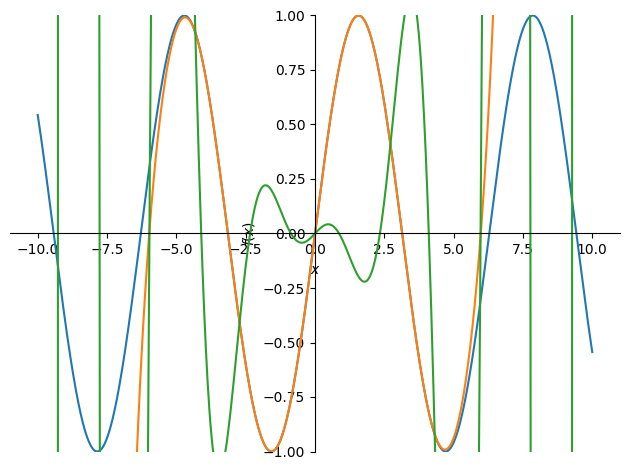

expression: $$\sin{\left(x \right)}$$ taylor: $$- \frac{x^{15}}{1307674368000} + \frac{x^{13}}{6227020800} - \frac{x^{11}}{39916800} + \frac{x^{9}}{362880} - \frac{x^{7}}{5040} + \frac{x^{5}}{120} - \frac{x^{3}}{6} + x$$ interpolation: $$- \frac{6863807236206946195208581251970634082695961 x^{15} \sin{\left(10 \right)}}{850470110534225388076082335260009765625000000000000} + \frac{13271732226321263443285729215344411928916113 x^{13} \sin{\left(10 \right)}}{6803760884273803104608658682080078125000000000000} - \frac{1486295812068712981963482049365919608776097 x^{11} \sin{\left(10 \right)}}{8504701105342253880760823352600097656250000000} + \frac{24550326055518737512314013537838001995118087 x^{9} \sin{\left(10 \right)}}{3401880442136901552304329341040039062500000000} - \frac{4740500639151308646074784335073997297446369 x^{7} \sin{\left(10 \right)}}{34018804421369015523043293410400390625000000} + \frac{3866393312078558158782313171979710652625447 x^{5} \sin{\left(10 \right)}}{3401880442136901552304329341040039062500000} - \frac{20450040644083340582092111948412278985937 x^{3} \sin{\left(10 \right)}}{6803760884273803104608658682080078125000} + \frac{173532334118901848818496221976352382023 x \sin{\left(10 \right)}}{136075217685476062092173173641601562500}$$

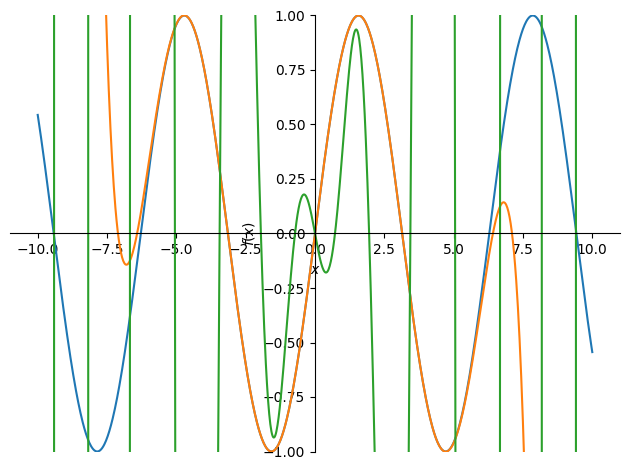

expression: $$\sin{\left(x \right)}$$ taylor: $$\frac{x^{17}}{355687428096000} - \frac{x^{15}}{1307674368000} + \frac{x^{13}}{6227020800} - \frac{x^{11}}{39916800} + \frac{x^{9}}{362880} - \frac{x^{7}}{5040} + \frac{x^{5}}{120} - \frac{x^{3}}{6} + x$$ interpolation: $$- \frac{460193190896713734040511808551450212185049593342712839 x^{17} \sin{\left(10 \right)}}{102485665646108504229151985076187420483398437500000000000000000} + \frac{319777534654755875604584040243049895393294793325653879 x^{15} \sin{\left(10 \right)}}{256214164115271260572879962690468551208496093750000000000000} - \frac{68675682978107676283577455316275552208769001132582359 x^{13} \sin{\left(10 \right)}}{512428328230542521145759925380937102416992187500000000000} + \frac{36100663476104290030680371346512776644568588966008483 x^{11} \sin{\left(10 \right)}}{5124283282305425211457599253809371024169921875000000000} - \frac{38937638768652606143820596797493506404715847844244779 x^{9} \sin{\left(10 \right)}}{204971331292217008458303970152374840966796875000000000} + \frac{64660562441553972656627093692056071919184948425784563 x^{7} \sin{\left(10 \right)}}{25621416411527126057287996269046855120849609375000000} - \frac{7453714839859237716060054811506054736122588678276201 x^{5} \sin{\left(10 \right)}}{512428328230542521145759925380937102416992187500000} + \frac{28197017909579632846141215952966925305567164593289 x^{3} \sin{\left(10 \right)}}{1024856656461085042291519850761874204833984375000} - \frac{214321510167099396692345060537658126937628650878 x \sin{\left(10 \right)}}{25621416411527126057287996269046855120849609375}$$

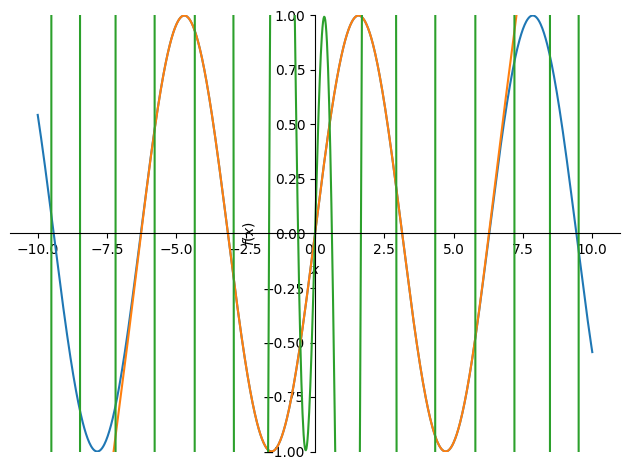

In [59]:
for n in range(1,20,2):
    nth_comparision(sin(x), n)